In [1]:
import pandas as pd													# data manipulation
import matplotlib.pyplot as plt												# graphs
import seaborn as sns													# graphs
import numpy as np													# graphs
from scipy.stats import norm												# statistics
from sklearn.preprocessing import StandardScaler									# statistics
from scipy import stats													# statistics
from math import *													# advance calculation	
from matplotlib import cm												# graphs
import sys														# system functions
import warnings														# indicating warnings
warnings.filterwarnings('ignore')											# ignore by default
from matplotlib.ticker import LinearLocator										# graphs
pd.set_option('display.max_columns', None)										# show all columns
pd.set_option('display.max_rows', 500)											# show all rows
np.set_printoptions(threshold=sys.maxsize)										# show arrays full
pd.set_option("display.max_colwidth", -1)										# show a complete text in a cell
pd.set_option('display.precision',5)											# precision decimals pd
np.set_printoptions(precision=3)											# precision decimals np
from xlsxwriter.workbook import Workbook										# CSV writing
import csv														# CSV writing	
import xgboost as xgb													# prediction
import pickle														# prediction	
import sklearn														# mutual information
import statsmodels.api as sm												# coefficient
from sklearn.ensemble import RandomForestClassifier									# random forest
from sklearn import linear_model											# linear regression
import pymysql														# MySql connection
import datetime														# time conversions
import random														# randomchoice
import math as math													# maths
import statistics													# statistics
import glob														# paths and files management
import matplotlib.image as mpimg											# matplot image

In [2]:
df = pd.read_csv('session_data.csv')

In [3]:
# Drop outliers in Clickouts:
df.drop( df.loc[df['Clickouts'] > 60 ].index ,inplace=True)
# Drop 'Not available' in duration to see box plot + change the type to int
df.drop( df.loc[df['Duration'] == '\\N' ].index ,inplace=True)
df['Duration'] = df['Duration'].astype(int)
#Replace 'Not Availabe'
df.replace({'ARR': {'\\N': np.nan}}, inplace=True, regex=False)
df.replace({'DEP': {'\\N': np.nan}}, inplace=True, regex=False)
# Convert Time to pandas dt
df['Date'] = pd.to_datetime(df['Date'].astype(str))
df['ARR'] = pd.to_datetime(df['ARR'])
df['DEP'] = pd.to_datetime(df['DEP'])
# Reset index to have all the indexes in order after droping some observations
df = df.reset_index(drop=True)
# Month:
df['Month'] = df['Date'].dt.month

In [4]:
# Count Values
pd.set_option('display.max_rows', 100)
for column in df.columns:
    print(column,':')
    display(df[column].value_counts(dropna=False))
    print('___________________________________','\n')

Date :


2018-03-12    16335
2018-04-02    16265
2018-03-05    16251
2018-03-20    16198
2018-03-11    16098
2018-04-03    16003
2018-03-19    15999
2018-04-24    15956
2018-03-18    15948
2018-03-15    15902
2018-03-06    15886
2018-03-04    15878
2018-03-14    15874
2018-03-13    15863
2018-04-26    15824
2018-04-23    15782
2018-03-07    15756
2018-04-29    15630
2018-04-25    15588
2018-03-21    15357
2018-04-28    15287
2018-04-30    15156
2018-03-26    15078
2018-03-22    14983
2018-03-28    14966
2018-04-04    14959
2018-03-08    14912
2018-03-01    14907
2018-04-22    14888
2018-04-10    14776
2018-04-09    14775
2018-04-05    14753
2018-03-25    14694
2018-04-18    14647
2018-03-27    14571
2018-03-17    14466
2018-03-09    14457
2018-04-16    14449
2018-03-02    14428
2018-04-17    14413
2018-03-23    14317
2018-04-15    14256
2018-03-03    14247
2018-04-27    14235
2018-03-10    14211
2018-03-16    14181
2018-04-11    14097
2018-03-30    14015
2018-03-29    13967
2018-04-01    13921


___________________________________ 

Hour :


14    48543
15    48209
19    48035
18    47293
17    46795
16    46650
13    46620
20    46432
12    43330
21    41606
11    39995
10    36848
9     34977
22    34909
8     32996
1     30955
23    30910
7     30599
0     30248
2     29742
6     27443
3     27013
5     25086
4     24748
Name: Hour, dtype: int64

___________________________________ 

Counter :


3100    1197
3770    1178
3810    1175
3700    1166
3750    1162
        ... 
349     1   
9062    1   
979     1   
869     1   
249     1   
Name: Counter, Length: 1939, dtype: int64

___________________________________ 

UserID :


ZY767Y98KU    8
HU1WFS9G79    7
0R0D2MNUW1    5
H1F3BSZOAD    5
0UKGRUXQF4    4
             ..
6G5QG0TCA6    1
RNT9O6I9TO    1
02KI6N2N4N    1
L171U09F71    1
J181JP0TU9    1
Name: UserID, Length: 893109, dtype: int64

___________________________________ 

Platform :


US    129111
BR    66749 
UK    56976 
DE    49115 
MX    43209 
JP    41460 
IN    38578 
IT    38578 
ES    37254 
AU    35753 
TR    32396 
FR    29929 
CA    24426 
AR    22743 
HK    14435 
RU    13810 
TW    13679 
MY    12713 
NL    12208 
PT    10314 
PL    9354  
KR    9191  
IE    8668  
SE    8652  
PH    8465  
CO    8423  
AA    7932  
GR    7637  
BE    6519  
CH    6282  
NZ    5986  
AT    5977  
FI    5788  
DK    5783  
SG    5659  
ZA    5482  
IL    5340  
TH    5237  
VN    5143  
ID    4873  
NO    4798  
CL    4355  
PE    3840  
CZ    3798  
HU    3462  
EC    3041  
RO    2932  
AE    2806  
BG    2636  
RS    2228  
UY    2178  
HR    1462  
SK    1349  
SI    918   
CN    352   
Name: Platform, dtype: int64

___________________________________ 

Repeater :


0    548011
1    351971
Name: Repeater, dtype: int64

___________________________________ 

Traffic :


6     294066
2     292415
8     200000
4     100000
10    13501 
Name: Traffic, dtype: int64

___________________________________ 

Country :


United States                      115871
Brazil                             67845 
United Kingdom                     56131 
Germany                            48589 
Mexico                             43499 
                                   ...   
Cook Islands                       1     
Comoros                            1     
Anguilla                           1     
Micronesia  Federated States of    1     
Saint Helena                       1     
Name: Country, Length: 230, dtype: int64

___________________________________ 

Device :


20    344582
2     175073
18    173612
16    62871 
4     37119 
12    36037 
26    28185 
14    19400 
28    18088 
22    3116  
24    1899  
Name: Device, dtype: int64

___________________________________ 

Clickouts :


0     555421
1     190204
2     71215 
3     33273 
4     17901 
5     10392 
6     6329  
7     4198  
8     2978  
9     1943  
10    1401  
11    1028  
12    760   
13    642   
14    478   
15    336   
16    263   
17    212   
18    157   
19    149   
21    95    
20    91    
23    72    
22    66    
24    57    
26    40    
25    39    
27    38    
28    22    
30    20    
31    18    
33    17    
29    17    
34    16    
32    12    
35    12    
38    12    
36    9     
40    7     
37    6     
41    5     
42    5     
39    4     
51    3     
47    3     
56    2     
55    2     
60    2     
43    2     
50    1     
49    1     
52    1     
53    1     
54    1     
48    1     
57    1     
59    1     
Name: Clickouts, dtype: int64

___________________________________ 

Bookings :


0    891281
1    8208  
2    406   
3    59    
4    19    
5    4     
7    3     
8    1     
6    1     
Name: Bookings, dtype: int64

___________________________________ 

Duration :


0        91239
4        16334
3        15224
12       14604
5        14197
         ...  
20270    1    
11667    1    
8492     1    
5074     1    
10489    1    
Name: Duration, Length: 8814, dtype: int64

___________________________________ 

Action :


2116    303379
2113    206974
2100    202564
2111    50042 
2115    34038 
2114    28884 
2106    19009 
2471    13483 
2391    7488  
2460    4553  
2316    3992  
2464    3059  
2317    3009  
2142    2917  
2226    2745  
2321    2289  
2227    1713  
2365    1045  
2160    985   
2315    949   
2319    942   
2252    784   
2289    465   
2153    460   
2358    316   
2374    303   
2306    297   
2119    281   
2166    258   
2284    255   
2345    216   
2292    188   
2120    175   
2371    160   
2455    156   
2143    108   
2362    103   
2145    102   
2313    102   
2257    99    
2155    98    
2296    94    
2351    87    
2188    79    
2156    72    
2331    65    
2123    47    
2146    46    
2121    42    
2442    40    
2461    39    
2357    35    
2445    33    
2501    33    
2122    27    
2369    26    
2364    19    
2446    19    
2443    17    
2465    14    
2260    13    
2286    12    
2310    12    
2367    11    
2350    10    
2440    10    
2502    9 

___________________________________ 

Items :


0      643159
1      46363 
2      42948 
3      17608 
4      13680 
       ...   
648    1     
649    1     
908    1     
842    1     
895    1     
Name: Items, Length: 783, dtype: int64

___________________________________ 

ARR :


NaT           555421
2018-04-28    6925  
2018-04-27    5530  
2018-03-30    5485  
2018-04-29    5086  
              ...   
2019-05-06    1     
2019-05-23    1     
2018-02-22    1     
2019-06-09    1     
2019-07-05    1     
Name: ARR, Length: 434, dtype: int64

___________________________________ 

DEP :


NaT           555421
2018-04-29    6295  
2018-04-30    5992  
2018-04-22    5985  
2018-04-01    5970  
              ...   
2018-02-24    1     
2019-05-14    1     
2019-06-29    1     
2019-06-22    1     
2019-05-25    1     
Name: DEP, Length: 451, dtype: int64

___________________________________ 

Month :


3    465624
4    434358
Name: Month, dtype: int64

___________________________________ 



In [5]:
# Show null values and duplicates
total = df.isnull().sum().sort_values(ascending=False)
percent = round((df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)*100, 3)
missing_data = pd.concat([total, percent], axis=1, keys=['NullTotal', 'Null%'])
for dup in missing_data.index:
    missing_data.at[dup,'DupTotal'] = df.duplicated(subset=[dup]).sum()
    missing_data.at[dup,'Dup%'] = round((df.duplicated(subset=[dup]).sum())/df.shape[0]*100,3)
missing_data

,NullTotal,Null%,DupTotal,Dup%
ARR,555421,61.715,899548.0,99.952
DEP,555421,61.715,899531.0,99.950
Month,0,0.000,899980.0,100.000
Traffic,0,0.000,899977.0,99.999
Hour,0,0.000,899958.0,99.997
Counter,0,0.000,898043.0,99.785
UserID,0,0.000,6873.0,0.764
Platform,0,0.000,899927.0,99.994
Repeater,0,0.000,899980.0,100.000
Device,0,0.000,899971.0,99.999


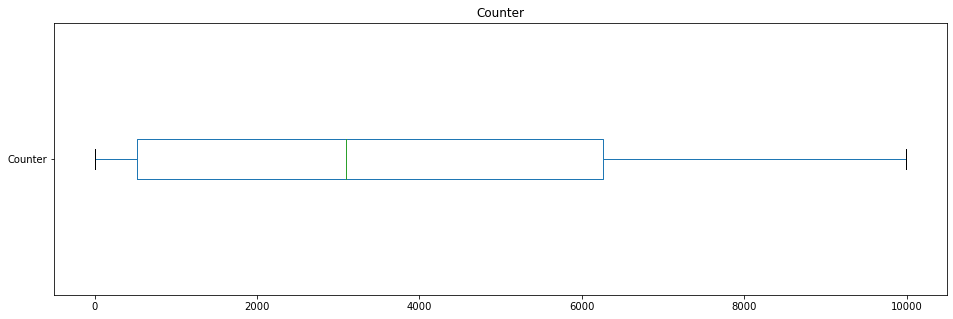

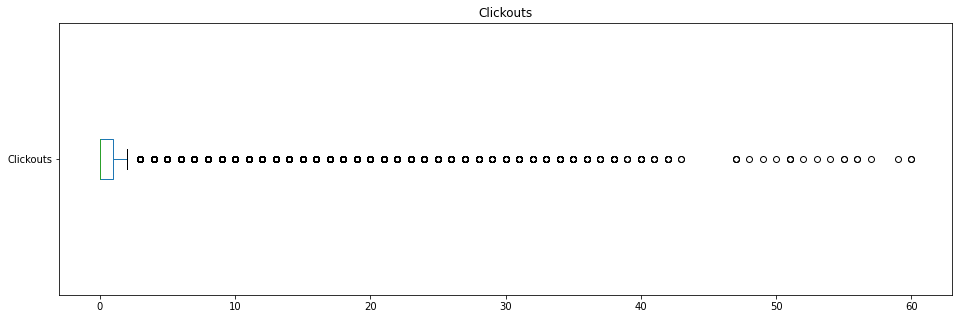

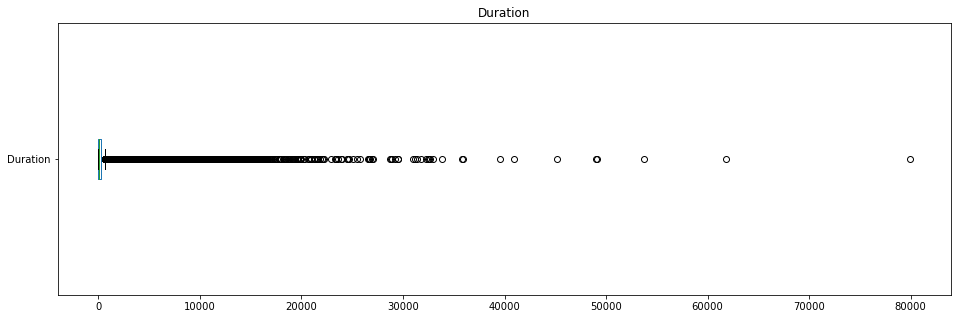

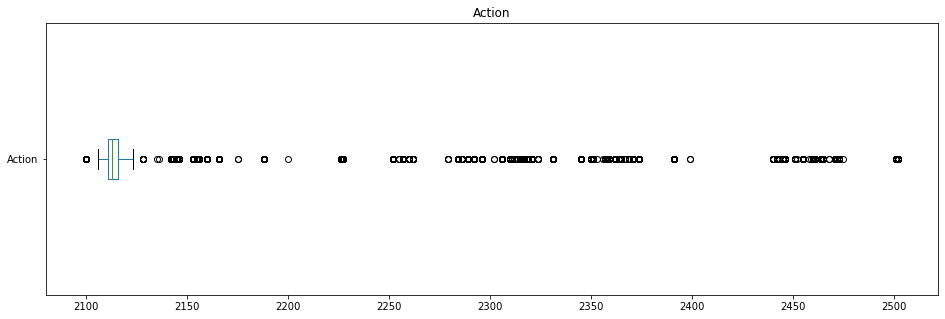

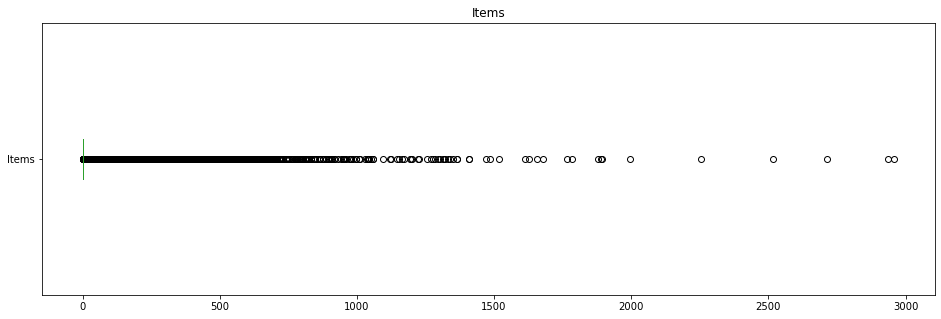

In [6]:
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']
year_feature = [feature for feature in numerical_features if 'ARR' in feature or 'DEP' in feature or 'Date'in feature]
discrete_feature=[feature for feature in numerical_features if len(df[feature].unique())<25 and feature not in year_feature]
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature+year_feature]

# Numeric-Continous feature, boxplot(spotting outliers)
for feature in continuous_feature:
    df[feature].plot(kind='box', vert=False, figsize=(16,5));
    plt.title(feature)
    plt.show()

In [7]:
# BounceRate (Satisfying the user) = (zero clickouts and zero Items and duration greater than 30 seconds) / total session
# TotalClickouts (making users to complete Trivago's principal objective) = sum clickouts 
# ReturningVisitor (Assessing the user interest) = Repeater1 / total

dfresult = pd.DataFrame(data={'Date':[''],'BounceRate':[''],'TotalClickouts':[''],'ReturningVisitor':['']},
columns=['Date','BounceRate','TotalClickouts','ReturningVisitor'])
index = 0

for date in df['Date'].unique():
    df2=df.loc[df['Date'] == date]
    dfresult.at[index,'Date'] = date
    dfresult.at[index,'BounceRate'] = round(((df2.loc[((df2['Clickouts'] == 0) & (df2['Items'] == 0)) & (df2['Duration'] > 30 )].shape[0])/df2.shape[0])*100,2)
    dfresult.at[index,'TotalClickouts'] = df2['Clickouts'].sum()
    dfresult.at[index,'ReturningVisitor'] = round((df2.loc[df2['Repeater'] == 1].shape[0]/df2.shape[0])*100,2)
    
    index=index+1

dfresult['Date'] = dfresult['Date'].astype(str).str[:10]
dfresult

,Date,BounceRate,TotalClickouts,ReturningVisitor
0,2018-03-01,17.37,12204,39.73
1,2018-03-02,16.6,11830,39.1
2,2018-03-03,17.22,11601,39.57
3,2018-03-04,16.91,13949,39.45
4,2018-03-05,16.93,14115,38.41
5,2018-03-06,16.66,13209,37.27
6,2018-03-07,16.69,13663,38.54
7,2018-03-08,16.79,12129,38.39
8,2018-03-09,16.46,11859,37.91
9,2018-03-10,15.8,11795,38.95


In [8]:
dfresult.to_csv('Visualization.csv', index=None)

In [9]:
df.loc[df['Repeater'] == 1]['Clickouts'].value_counts(normalize=True)*100

0     58.96423
1     22.55186
2     8.48252 
3     3.97874 
4     2.14563 
5     1.24613 
6     0.76342 
7     0.50487 
8     0.37503 
9     0.23212 
10    0.16933 
11    0.13297 
12    0.08779 
13    0.07302 
14    0.06393 
15    0.03921 
16    0.03608 
17    0.02415 
18    0.02159 
19    0.01989 
21    0.01051 
23    0.01023 
20    0.00938 
22    0.00824 
24    0.00824 
26    0.00625 
25    0.00511 
27    0.00483 
33    0.00313 
28    0.00284 
30    0.00284 
29    0.00256 
31    0.00227 
35    0.00170 
40    0.00142 
38    0.00142 
34    0.00114 
32    0.00114 
39    0.00085 
42    0.00085 
37    0.00057 
36    0.00028 
56    0.00028 
41    0.00028 
47    0.00028 
51    0.00028 
53    0.00028 
60    0.00028 
Name: Clickouts, dtype: float64

In [10]:
df.loc[df['Repeater'] == 0]['Clickouts'].value_counts(normalize=True)*100

# There is 5% aapprox. higher chance of clickouts in returning users to new users.

0     63.48121
1     20.22368
2     7.54711 
3     3.51617 
4     1.88847 
5     1.09596 
6     0.66459 
7     0.44178 
8     0.30255 
9     0.20547 
10    0.14689 
11    0.10219 
12    0.08230 
13    0.07025 
14    0.04617 
15    0.03613 
16    0.02482 
17    0.02317 
18    0.01478 
19    0.01442 
20    0.01058 
21    0.01058 
22    0.00675 
23    0.00657 
24    0.00511 
25    0.00383 
27    0.00383 
26    0.00328 
28    0.00219 
34    0.00219 
30    0.00182 
31    0.00182 
29    0.00146 
32    0.00146 
36    0.00146 
38    0.00128 
33    0.00109 
35    0.00109 
37    0.00073 
41    0.00073 
43    0.00036 
55    0.00036 
51    0.00036 
47    0.00036 
40    0.00036 
42    0.00036 
48    0.00018 
49    0.00018 
50    0.00018 
59    0.00018 
52    0.00018 
54    0.00018 
39    0.00018 
56    0.00018 
57    0.00018 
60    0.00018 
Name: Clickouts, dtype: float64

In [11]:
# Which features were associated with clickouts:

dftarget = df.loc[df['Clickouts'] > 0]
print('Marketing channel:',dftarget['Traffic'].mode().sum())
print('Country:',dftarget['Country'].mode().sum())
print('Device:',dftarget['Device'].mode().sum())
print('Booking probability:',round(dftarget.loc[dftarget['Bookings']>0].shape[0]/dftarget.shape[0]*100,2),'%')
print('Session duration:',round(dftarget['Duration'].mean(),2),'s')
print('Landing page:',dftarget['Action'].mode().sum())
print('Trip Duration:',(dftarget['DEP']-dftarget['ARR']).mean())

Marketing channel: 2
Country: United States
Device: 20
Booking probability: 2.48 %
Session duration: 764.76 s
Landing page: 2100
Trip Duration: 2 days 15:12:44.391791


In [12]:
# In which countries we have more rate clickouts to visit?

for country in dftarget['Country'].value_counts().index[:18]:
    print(country,':', round(dftarget.loc[dftarget['Country'] == country].shape[0]/df.loc[df['Country'] == country].shape[0],2),'%' )

United States : 0.37 %
United Kingdom : 0.43 %
Brazil : 0.35 %
Germany : 0.42 %
Japan : 0.48 %
Spain : 0.42 %
Mexico : 0.34 %
Italy : 0.39 %
Australia : 0.39 %
Turkey : 0.39 %
India : 0.31 %
France : 0.4 %
Canada : 0.4 %
Argentina : 0.37 %
Netherlands : 0.43 %
Russian Federation : 0.42 %
Taiwan : 0.36 %
Malaysia : 0.4 %


In [13]:
dftarget['Country'].value_counts().loc[lambda x : (x<500) & (x>50)]

Morocco                      495
Egypt                        445
Slovenia                     421
Croatia                      397
Europe                       367
Costa Rica                   349
Dominican Republic           329
Panama                       261
Guatemala                    259
Macau                        250
Venezuela                    246
Lebanon                      240
Tunisia                      204
Puerto Rico                  184
Bosnia and Herzegovina       182
China                        172
Luxembourg                   158
Cyprus                       156
Jordan                       140
Reunion                      137
Honduras                     136
El Salvador                  134
Qatar                        127
Ukraine                      122
Malta                        117
Asia/Pacific Region          105
Kuwait                       104
Bolivia                      100
\N                           98 
Bangladesh                   96 
Oman      

In [14]:
# In which platform we have more rate clickouts to visit?

for platform in dftarget['Platform'].value_counts().index:
    print(platform,':', round(dftarget.loc[dftarget['Platform'] == platform].shape[0]/df.loc[df['Platform'] == platform].shape[0]*100,2),'%' )

US : 36.61 %
UK : 42.71 %
BR : 35.58 %
DE : 42.37 %
JP : 48.11 %
ES : 42.31 %
IT : 39.05 %
MX : 34.43 %
AU : 37.68 %
TR : 39.61 %
IN : 31.54 %
FR : 39.26 %
CA : 40.83 %
AR : 36.73 %
RU : 42.41 %
NL : 43.49 %
MY : 40.17 %
TW : 35.78 %
HK : 33.18 %
PL : 44.83 %
PT : 40.42 %
SE : 41.84 %
IE : 40.9 %
NZ : 46.81 %
GR : 36.15 %
PH : 32.24 %
CO : 31.33 %
CH : 41.01 %
BE : 38.15 %
KR : 26.59 %
AT : 40.52 %
DK : 40.34 %
FI : 39.65 %
ZA : 41.3 %
IL : 42.21 %
AA : 27.86 %
SG : 37.04 %
NO : 40.45 %
CZ : 39.68 %
CL : 34.49 %
HU : 43.21 %
ID : 28.4 %
TH : 26.31 %
VN : 26.42 %
PE : 28.44 %
BG : 39.23 %
RO : 35.06 %
AE : 36.56 %
RS : 34.07 %
UY : 31.22 %
EC : 22.16 %
SK : 40.85 %
HR : 32.9 %
SI : 42.05 %
CN : 34.09 %


In [15]:
# New users' rate of Clickouts

df.loc[(df['Repeater'] == 0) & (df['Clickouts'] > 0)].shape[0]/df.loc[(df['Repeater'] == 0) & (df['Clickouts'] == 0)].shape[0]

0.5752693426544481

In [16]:
# Returning users' rate of Clickouts

df.loc[(df['Repeater'] == 1) & (df['Clickouts'] > 0)].shape[0]/df.loc[(df['Repeater'] == 1) & (df['Clickouts'] == 0)].shape[0]

0.6959433739525964

In [17]:
df['Duration'].mean()

398.2345146902938

In [18]:
dftarget['Duration'].mean()

764.7645990114958

In [19]:
# the rate of clickouts in most popular platforms:

dfshow = pd.DataFrame(data={'landing':[''],'show':['']},columns=['landing','show'])
index = 0
for action in dftarget['Action'].value_counts().index[:5]:
    show=round(dftarget.loc[dftarget['Action'] == action].shape[0]/df.loc[df['Action'] == action].shape[0]*100,2)
    print(action,':', show ,'%' )
    dfshow.at[index,'landing'] = action
    dfshow.at[index,'show'] = show
    index=index+1
dfshow.set_index('landing', inplace=True)
dfshow = dfshow.sort_values(['show'], ascending=[True])

2100 : 56.1 %
2116 : 33.74 %
2113 : 34.01 %
2111 : 38.42 %
2115 : 33.99 %


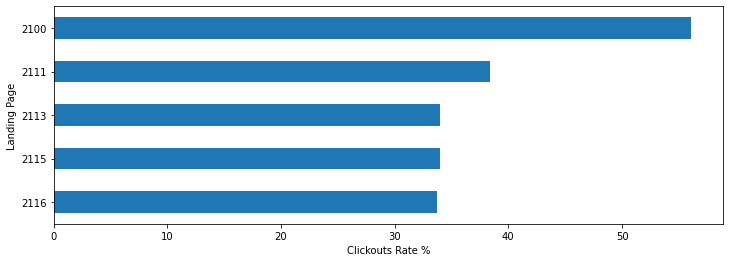

In [20]:
dfshow['show'].plot(kind='barh', figsize=(12,4))
plt.xlabel('Clickouts Rate %')
plt.ylabel('Landing Page');

In [21]:
df.head(10)

,Date,Hour,Counter,UserID,Platform,Repeater,Traffic,Country,Device,Clickouts,Bookings,Duration,Action,Items,ARR,DEP,Month
0,2018-03-01,0,0,6LMGMPDWDW,FR,1,4,France,20,1,0,67,2116,0,2018-03-04,2018-03-05,3
1,2018-03-01,0,1,1TGK7VAP15,FR,0,8,Algeria,20,1,0,101,2113,0,2018-03-03,2018-03-04,3
2,2018-03-01,0,1,491EMMIKOY,ES,0,6,Colombia,20,1,0,894,2115,3,2018-03-17,2018-03-18,3
3,2018-03-01,0,11,3GQEASR1W4,IT,0,8,Italy,20,0,0,0,2116,0,NaT,NaT,3
4,2018-03-01,0,11,42PFN6XW70,IN,0,2,India,4,2,0,1315,2100,73,2018-03-10,2018-03-11,3
5,2018-03-01,0,11,BJ1R6VHA3U,ES,1,2,Spain,20,1,0,181,2100,1,2018-06-16,2018-06-23,3
6,2018-03-01,0,20,HNPS3LRZ79,ES,0,2,France,2,0,0,0,2100,0,NaT,NaT,3
7,2018-03-01,0,31,EXBAH4BE47,IN,0,8,India,20,0,0,49,2116,0,NaT,NaT,3
8,2018-03-01,0,70,YL1C7V7907,DE,0,4,Germany,20,0,0,684,2113,0,NaT,NaT,3
9,2018-03-01,0,71,RXY829Z5JS,ES,0,4,Spain,20,0,0,15,2114,0,NaT,NaT,3


In [22]:
df['Items'].mean()

6.595644135104925

In [23]:
dftarget['Items'].mean()

11.621866665118803

In [24]:
df.head(10)

,Date,Hour,Counter,UserID,Platform,Repeater,Traffic,Country,Device,Clickouts,Bookings,Duration,Action,Items,ARR,DEP,Month
0,2018-03-01,0,0,6LMGMPDWDW,FR,1,4,France,20,1,0,67,2116,0,2018-03-04,2018-03-05,3
1,2018-03-01,0,1,1TGK7VAP15,FR,0,8,Algeria,20,1,0,101,2113,0,2018-03-03,2018-03-04,3
2,2018-03-01,0,1,491EMMIKOY,ES,0,6,Colombia,20,1,0,894,2115,3,2018-03-17,2018-03-18,3
3,2018-03-01,0,11,3GQEASR1W4,IT,0,8,Italy,20,0,0,0,2116,0,NaT,NaT,3
4,2018-03-01,0,11,42PFN6XW70,IN,0,2,India,4,2,0,1315,2100,73,2018-03-10,2018-03-11,3
5,2018-03-01,0,11,BJ1R6VHA3U,ES,1,2,Spain,20,1,0,181,2100,1,2018-06-16,2018-06-23,3
6,2018-03-01,0,20,HNPS3LRZ79,ES,0,2,France,2,0,0,0,2100,0,NaT,NaT,3
7,2018-03-01,0,31,EXBAH4BE47,IN,0,8,India,20,0,0,49,2116,0,NaT,NaT,3
8,2018-03-01,0,70,YL1C7V7907,DE,0,4,Germany,20,0,0,684,2113,0,NaT,NaT,3
9,2018-03-01,0,71,RXY829Z5JS,ES,0,4,Spain,20,0,0,15,2114,0,NaT,NaT,3


In [25]:
# BounceRate (Satisfying the user) = (zero clickouts and zero Items and duration greater than 30 seconds) / total session
# TotalClickouts (making users to complete Trivago's principal objective) = sum clickouts 
# ReturningVisitor (Assessing the user interest) = Repeater1 / total

dfresult2 = pd.DataFrame(data={'Month':[''],'BounceRate':[''],'TotalClickouts':[''],'MeanClickouts':[''],'ReturningVisitor':[''],'ReturningClickouts':[''],'Device':[''],'Traffic':[''],'Duration':[''],'Contents':[''],'EntryPage':['']},
columns=['Month','BounceRate','TotalClickouts','MeanClickouts','ReturningVisitor','ReturningClickouts','Device','Traffic','Duration', 'Contents','EntryPage'])
index = 0

for month in df['Month'].unique():
    df2=df.loc[df['Month'] == month]
    dfresult2.at[index,'Month'] = month
    dfresult2.at[index,'BounceRate'] = round(((df2.loc[((df2['Clickouts'] == 0) & (df2['Items'] == 0)) & (df2['Duration'] > 30 )].shape[0])/df2.shape[0])*100,2)
    dfresult2.at[index,'TotalClickouts'] = df2['Clickouts'].sum()
    dfresult2.at[index,'MeanClickouts'] = round(df2['Clickouts'].mean(),2)
    dfresult2.at[index,'ReturningVisitor'] = round((df2.loc[df2['Repeater'] == 1].shape[0]/df2.shape[0])*100,2)
    dfresult2.at[index,'ReturningClickouts'] = round(df2.loc[(df['Repeater'] == 1) & (df2['Clickouts'] > 0)].shape[0]/df2.loc[(df2['Repeater'] == 1) & (df2['Clickouts'] == 0)].shape[0]*100,2)
    dfresult2.at[index,'Device'] = df2['Device'].mode().sum()
    dfresult2.at[index,'Traffic'] =df2['Traffic'].mode().sum()
    dfresult2.at[index,'Duration'] = round(df2['Duration'].mean(),2)
    dfresult2.at[index,'Contents'] = round(df2['Items'].mean(),2)
    dfresult2.at[index,'EntryPage'] = df2['Action'].mode().sum()
    
    index=index+1

dfresult2['Month'] = dfresult2['Month'].astype(str).str[:10]
dfresult2.at[0,'Month'] = 'March'
dfresult2.at[1,'Month'] = 'April'
dfresult2

,Month,BounceRate,TotalClickouts,MeanClickouts,ReturningVisitor,ReturningClickouts,Device,Traffic,Duration,Contents,EntryPage
0,March,16.39,392866,0.84,38.93,70.03,20,2,404.25,6.68,2116
1,April,16.12,358312,0.82,39.3,69.13,20,6,391.78,6.51,2116
